# import

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [109]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [111]:
path = r'\Users\grego\OneDrive\Desktop\Transfer Files\Career Foundry\Specialization\Task 2'

In [113]:
df_pleasant = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','pleasant_data.csv'))

In [115]:
df_weather = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','weather_data_original.csv'))

# work 1990

In [118]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [122]:
df_temp_1 = df_weather[df_weather['DATE'].astype(str).str.contains('199')]
df_temp_1

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,1,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,19900102,1,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,19900103,1,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,19900104,1,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,19900105,1,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,1.0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,0.0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,0.1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,0.5,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [127]:
df_temp = df_temp_1[['DATE','BUDAPEST_temp_max','MADRID_temp_max']]

In [129]:
df_temp

,DATE,BUDAPEST_temp_max,MADRID_temp_max
10958,19900101,0.6,8.4
10959,19900102,0.5,7.4
10960,19900103,1.1,9.0
10961,19900104,0.6,10.5
10962,19900105,0.6,10.4
...,...,...,...
14605,19991227,7.0,13.9
14606,19991228,3.8,10.5
14607,19991229,2.8,5.9
14608,19991230,3.9,6.6


In [131]:
df_temp['DATE'] = df_temp['DATE'].astype(str)

C:\Users\grego\AppData\Local\Temp\ipykernel_3712\1511885814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = df_temp['DATE'].astype(str)


In [133]:
df_temp = pd.DataFrame(df_temp)

df_temp['MONTH'] = df_temp['DATE'].str[4:-2]

print(df_temp)

           DATE  BUDAPEST_temp_max  MADRID_temp_max MONTH
10958  19900101                0.6              8.4    01
10959  19900102                0.5              7.4    01
10960  19900103                1.1              9.0    01
10961  19900104                0.6             10.5    01
10962  19900105                0.6             10.4    01
...         ...                ...              ...   ...
14605  19991227                7.0             13.9    12
14606  19991228                3.8             10.5    12
14607  19991229                2.8              5.9    12
14608  19991230                3.9              6.6    12
14609  19991231                2.0              7.9    12

[3652 rows x 4 columns]


In [135]:
df_temp = df_temp.groupby('MONTH').mean('BUDAPEST_temp_max','MADRID_temp_max').reset_index()
df_temp

,MONTH,BUDAPEST_temp_max,MADRID_temp_max
0,01,4.050645,9.765806
1,02,6.584043,12.440426
2,03,11.302581,16.960000
3,04,16.533333,18.393333
4,05,22.182258,22.398065
5,06,25.481333,27.619333
6,07,27.757742,32.344194
7,08,28.021613,31.712903
8,09,21.844667,25.408667
9,10,15.663548,18.500645


In [137]:
df_prec = df_temp_1[['DATE','BUDAPEST_precipitation','MADRID_precipitation']]

In [139]:
df_prec['DATE'] = df_prec['DATE'].astype(str)

C:\Users\grego\AppData\Local\Temp\ipykernel_3712\3317543743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prec['DATE'] = df_prec['DATE'].astype(str)


In [141]:
df_prec = pd.DataFrame(df_prec)

df_prec['MONTH'] = df_prec['DATE'].str[4:-2]

print(df_prec)

           DATE  BUDAPEST_precipitation  MADRID_precipitation MONTH
10958  19900101                    0.00                  0.65    01
10959  19900102                    0.00                  0.50    01
10960  19900103                    0.00                  0.07    01
10961  19900104                    0.00                  0.00    01
10962  19900105                    0.00                  0.00    01
...         ...                     ...                   ...   ...
14605  19991227                    0.17                  0.09    12
14606  19991228                    2.73                  0.66    12
14607  19991229                    0.00                  1.45    12
14608  19991230                    0.00                  0.00    12
14609  19991231                    0.00                  0.00    12

[3652 rows x 4 columns]


In [143]:
df_prec = df_prec.groupby('MONTH').mean('BUDAPEST_precipitation','MADRID_precipitation').reset_index()
df_prec

,MONTH,BUDAPEST_precipitation,MADRID_precipitation
0,01,0.087935,0.104290
1,02,0.078050,0.093298
2,03,0.062355,0.061000
3,04,0.151833,0.098033
4,05,0.173419,0.174226
5,06,0.225567,0.072833
6,07,0.168774,0.043742
7,08,0.115032,0.036323
8,09,0.168933,0.099567
9,10,0.158935,0.202452


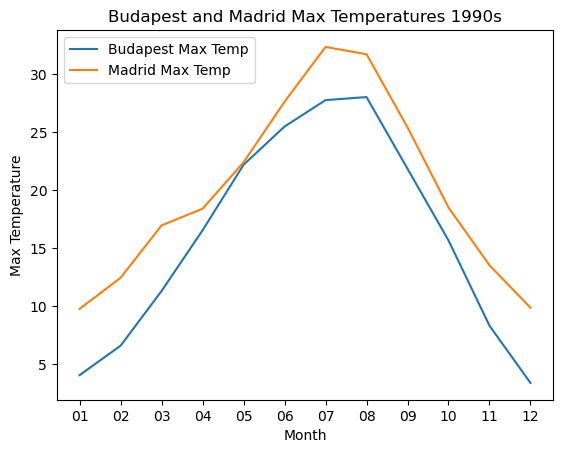

In [147]:
plt.plot(df_temp['MONTH'], df_temp['BUDAPEST_temp_max'], label='Budapest Max Temp')
plt.plot(df_temp['MONTH'], df_temp['MADRID_temp_max'], label='Madrid Max Temp')

plt.xlabel('Month')
plt.ylabel('Max Temperature')
plt.title('Budapest and Madrid Max Temperatures 1990s')

plt.legend()

plt.show()